In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv("../datasets/Google.csv")
df.index = pd.DatetimeIndex(df['Date'].values)
close = df["Close"]

In [1]:
import numpy as np


def get_hhi(bet_ret):
    if bet_ret.shape[0] <= 2:
        return np.nan
    wght = bet_ret / bet_ret.sum()
    hhi = (wght ** 2).sum()
    hhi = (hhi - bet_ret.shape[0] ** -1) / (1 - bet_ret.shape[0] ** -1)
    return hhi

In [9]:
ret = close.pct_change().dropna()
hhi_pos = get_hhi(ret[ret >= 0])
hhi_neg = get_hhi(ret[ret < 0])
hhi_m = get_hhi(ret.groupby(pd.TimeGrouper(freq='M')).count())
print(hhi_pos, hhi_neg, hhi_m)

0.000835603622536342 0.0013499951193839117 4.8223459418227205e-05


/home/tom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


In [34]:
def computeDD_TUW(series, dollars=False):
    df = series.to_frame('pnl')
    df['hwm'] = series.expanding().max()
    # Lowest points with hwm
    min_df = df.groupby('hwm').min().reset_index()
    min_df.columns = ['hwm', 'min']
    # Index is time for hwm
    min_df.index = df['hwm'].drop_duplicates(keep='first').index
    min_df = min_df[min_df['hwm'] > min_df['min']]
    if dollars:
        dd = min_df['hwm'] - min_df['min']
    else:
        dd = 1 - min_df['min'] / min_df['hwm']
    tuw = ((min_df.index[1:] - min_df.index[:-1]) / np.timedelta64(1, 'Y')).values
    tuw = pd.Series(tuw, index=min_df.index[:-1])
    return dd, tuw

In [36]:
dd, tuw = computeDD_TUW(close)

2004-08-23    0.085832
2004-09-20    0.012735
2004-09-23    0.021189
2004-09-29    0.011291
2004-10-05    0.009323
dtype: float64


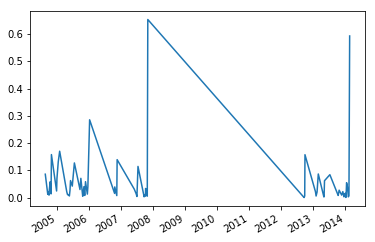

In [43]:
print(dd.head())
dd.plot()

2004-08-23    0.076661
2004-09-20    0.008214
2004-09-23    0.016427
2004-09-29    0.016427
2004-10-05    0.005476
dtype: float64


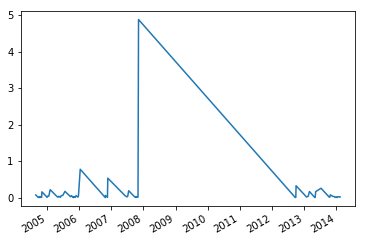

In [44]:
print(tuw.head())
tuw.plot()

In [47]:
(close.index[1:] - close.index[:-1]) / np.timedelta64(1, 'Y')

Float64Index([0.002737907006988508, 0.008213721020965523, 0.002737907006988508,
              0.002737907006988508, 0.002737907006988508, 0.002737907006988508,
              0.008213721020965523, 0.002737907006988508, 0.002737907006988508,
              0.002737907006988508,
              ...
              0.010951628027954031, 0.002737907006988508, 0.002737907006988508,
              0.002737907006988508, 0.008213721020965523, 0.002737907006988508,
              0.002737907006988508, 0.002737907006988508, 0.002737907006988508,
              0.010951628027954031],
             dtype='float64', length=3124)